# Matrix decomposition

### Problem 0

Generate random matrix of a reasonable size, perform SVD decomposition, obtain initial matrix from it, calculate the error.

In [6]:
import numpy as np
import numpy.linalg as la

In [8]:
A = np.random.random((50, 100))
print(A.shape)

(50, 100)


In [9]:
u, s, v = la.svd(A)
print(u.shape)
print(s.shape)
print(v.shape)

(50, 50)
(50,)
(100, 100)


In [16]:
S = np.zeros((50, 100))
S[:50, :50] = np.diag(s)
B = u @ S @ v

In [17]:
print(np.max(np.abs(A-B)))

8.104628079763643e-15


### Problem 1
Load *rocket* image from scikit-image library (make sure you're working with normalized pixel values):

`from skimage import data
from skimage.color import rgb2gray
img = data.rocket()
gr_img = rgb2gray(img)`

Perform SVD decomposition, try restoring the image with $1, 2, \ldots, k$ singular vectors, check at which $k$ the restored result is reasonably good. Calculate the reduction in necessary storage for the image compared to the original image. Then try performing the same process with colored version separately for each channel (same $k$ for every channel, different $k$ for every channels). Try the same for *chelsea* image: which image takes more data to restore to the tolerable quality?

In [19]:
from skimage import data
from skimage.color import rgb2gray
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

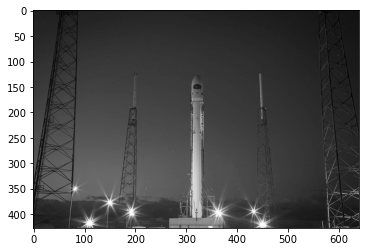

In [23]:
img = data.rocket()
gr_img = rgb2gray(img)

plt.imshow(gr_img, cmap='gray')
plt.show()

In [26]:
U, s, V = la.svd(gr_img)
print(U.shape, s.shape, V.shape)

(427, 427) (427,) (640, 640)


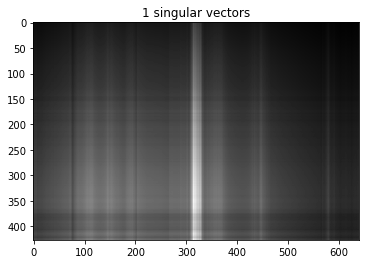

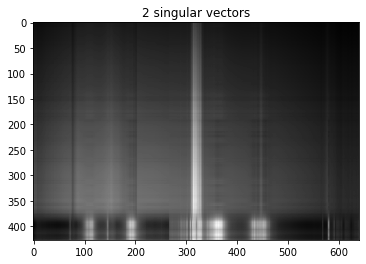

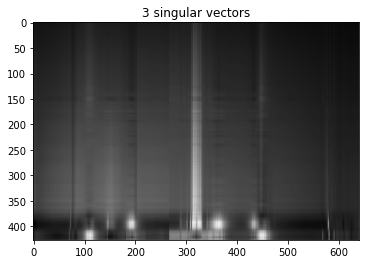

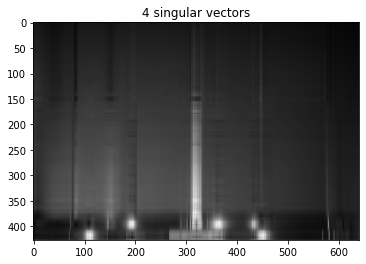

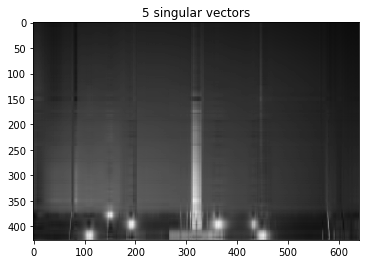

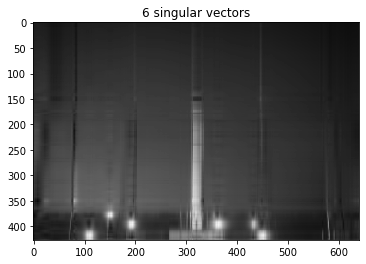

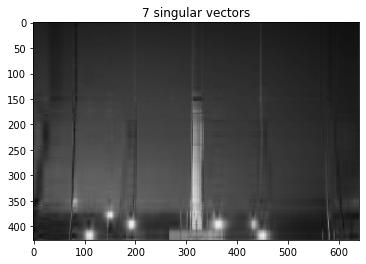

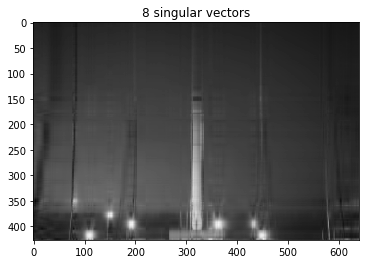

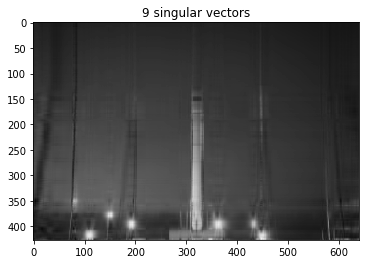

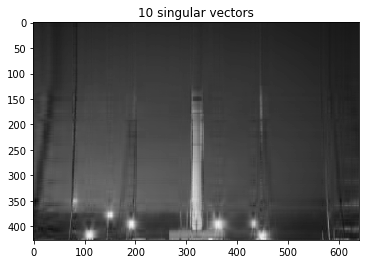

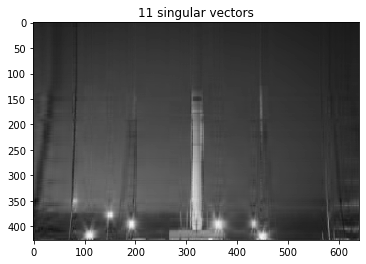

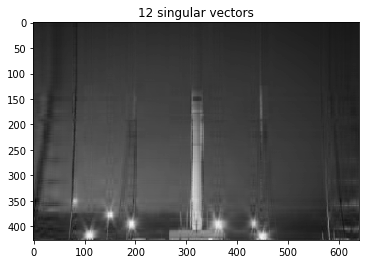

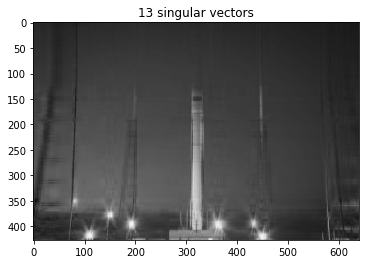

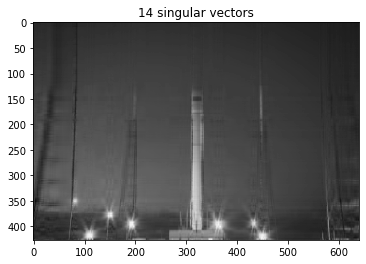

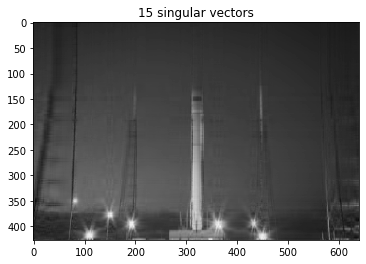

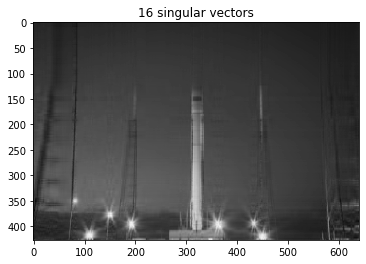

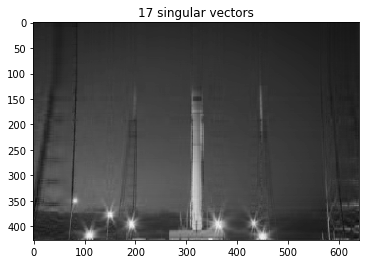

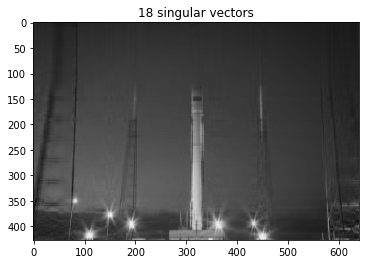

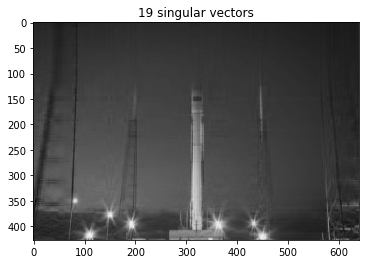

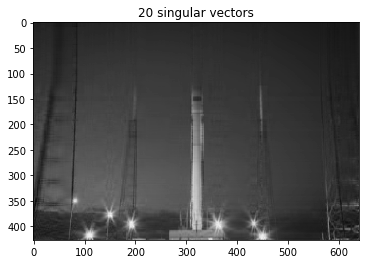

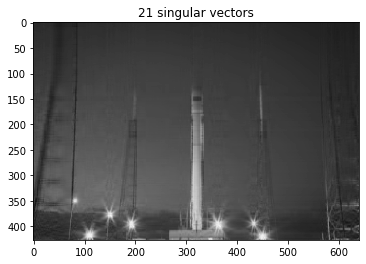

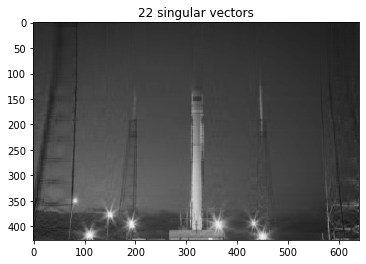

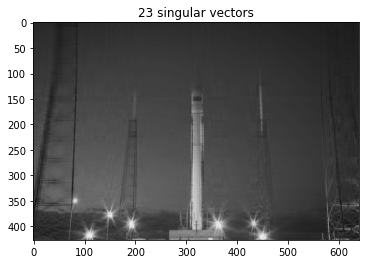

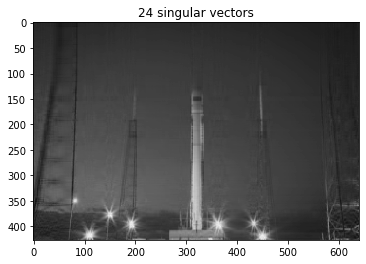

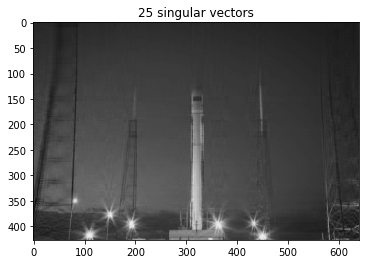

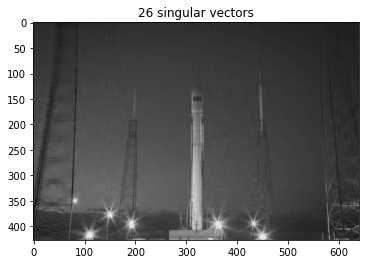

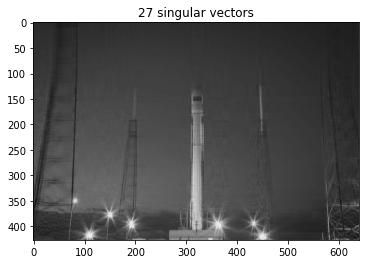

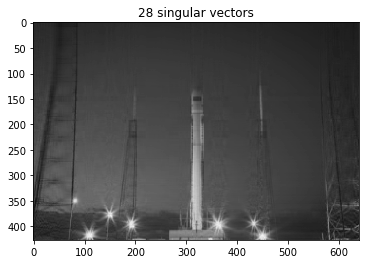

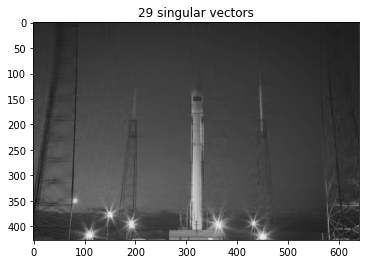

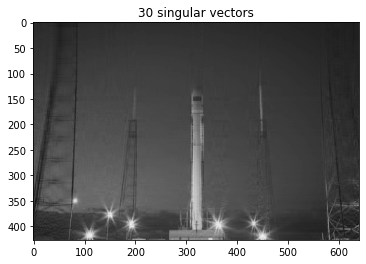

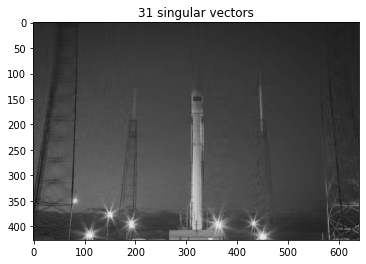

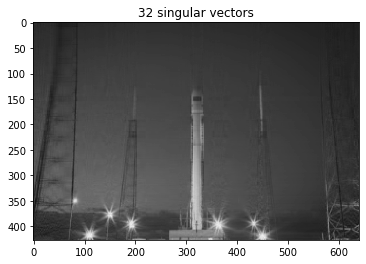

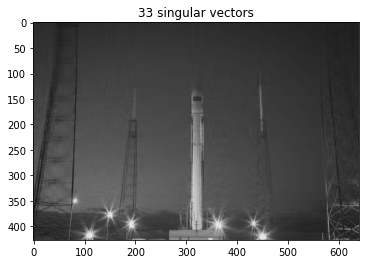

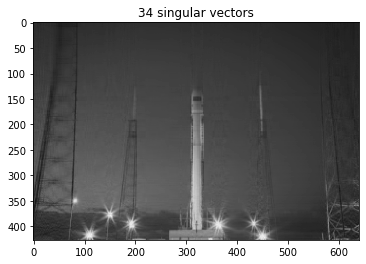

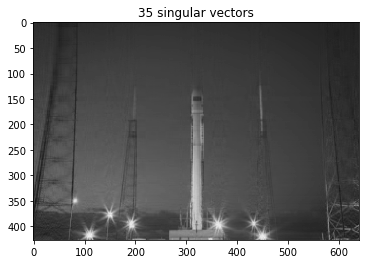

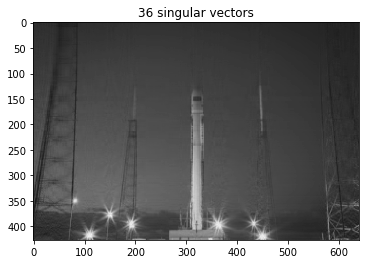

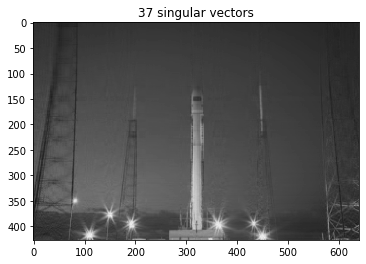

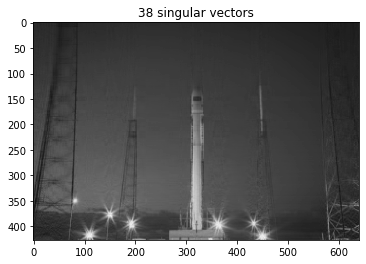

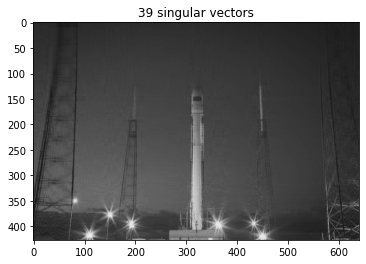

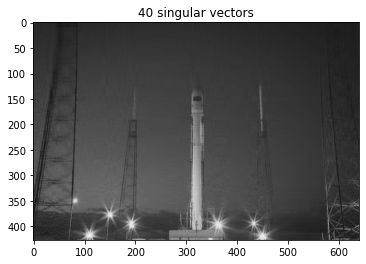

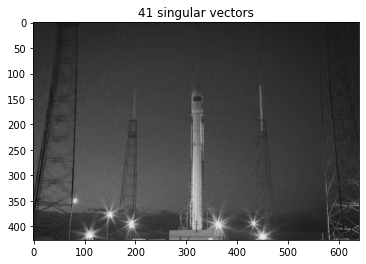

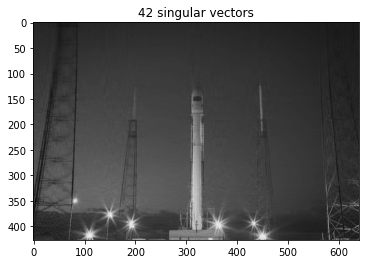

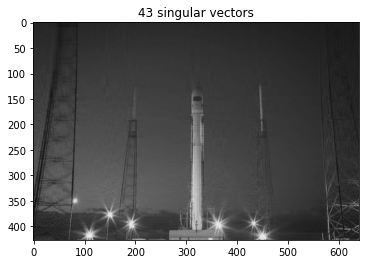

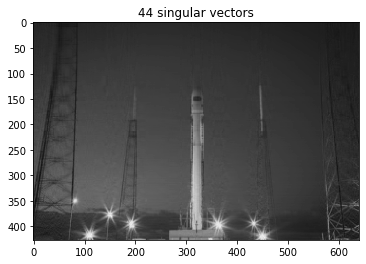

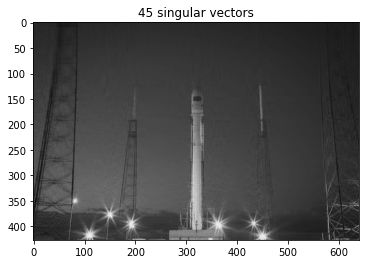

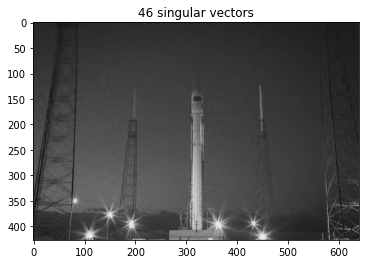

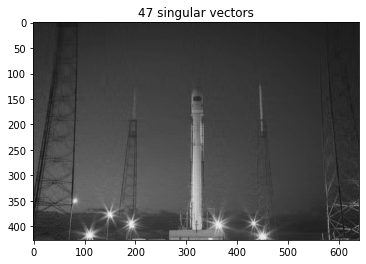

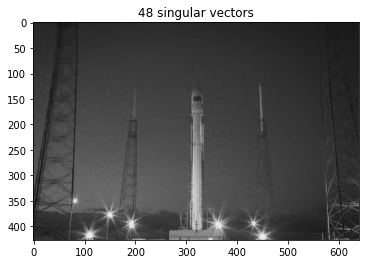

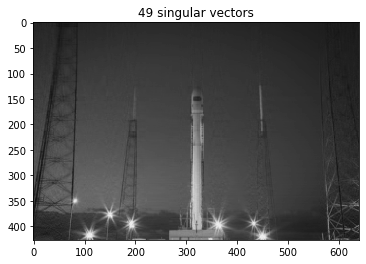

In [34]:
S = np.zeros((U.shape[0], V.shape[0]))
np.fill_diagonal(S, s)
for i in range(1, 50):
    Si = S.copy()
    Si[i:, i:] = 0
    A = U @ Si @ V
    plt.imshow(A, cmap='gray')
    plt.title(f'{i} singular vectors')
    plt.show()

In [35]:
k = 50

size_orig = gr_img.size * 1
size_compressed = k*U.shape[0] + k + k*V.shape[0]

print(size_orig, size_compressed, size_compressed/size_orig*100)

273280 53400 19.5403981264637


# Least Squares Problem

### Problem 2
Load Boston housing dataset and perform linear regression on it using Linear Least Squares method. Check the performance (MSE) on a selected testing subset.

Don't forget than if our model is $y = a_1\theta_1 + \ldots a_n\theta_n + \theta_0$ we need to expand data matrix with additional column of ones to match $n+1$ parameters (including $\theta_0$).

Useful function `scipy.linalg.pinv`

In [41]:
import sklearn.datasets as datasets
import numpy as np
import scipy.linalg as la

In [43]:
data = datasets.load_boston()
print(data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [48]:
X_train, X_test = data['data'][:400,:], data['data'][400:,:]
y_train, y_test = data['target'][:400], data['target'][400:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 13) (400,)
(106, 13) (106,)


In [49]:
A = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
print(A.shape)

(400, 14)


In [51]:
# A.T*A * theta  = A.T*y
# B * theta = b  -> theta = B^-1 * b
B = A.T @ A
b = A.T @ y_train

theta = la.pinv(B) @ b

print(theta)

[ 2.86725996e+01 -1.91246374e-01  4.42289967e-02  5.52207977e-02
  1.71631351e+00 -1.49957220e+01  4.88773025e+00  2.60921031e-03
 -1.29480799e+00  4.84787214e-01 -1.54006673e-02 -8.08795026e-01
 -1.29230427e-03 -5.17953791e-01]


In [52]:
A_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred = A_test @ theta

print(np.mean((y_pred - y_test)**2))

37.8937785997432


In [53]:
print(np.max(np.abs(y_pred - y_test)))

12.707439090372326


### Problem 3
Load *digits* dataset, select images corresponding to digits 0 and 1. Set apart random 10% of the data for evaluation. Use Linear Least Squares to train a naive classifier by regressing the pixel values of every digits to it's numerical value:
$$y_i = \sum a_i\theta_i + \theta_0$$
where $y_i$ is 0 or 1. Perform classification by thresholding the regressed value. Check the accuracy on the training and testing subsets.

**Make sure to fix random seed for reproducibility.**

### Problem 4
Generate arbitrary nonlinear function on a sample of 10 points from $(0; 10]$, add some Gaussian or discrete noise to the values. Solve Least-Squares problem to fit the data points with polynomial models of various degree. Report RMSE on the obtained models. Plot points vs. model vs. true function. Useful functions: `np.vander`, `np.linspace`, `np.vectorize`

# Self-practice problems

### Problem 1
Load *digits* dataset:

`from sklearn.datasets import load_digits
digits = load_digits()`

Perform SVD on the data, inspect the singular values, try reconstructing the data with some fixed number of singular vectors, check the visual quality of the reconstruted samples. Try the same with a subset of images corresponding to a specific digit of your choice - how many singular vectors you need for similar quality of reconstriction?

### Problem 2

Попробуйте решить Задачу 1 (Boston housing dataset), моделируя данные многочленом второй степени:
$$y = \theta_0 + a_1\theta_1 + \ldots+ a_n\theta_n + a_1^2\theta_{11} + a_1a_2\theta_{12}+ \ldots +a_n^2\theta_{nn} = a_0 + \sum_{i=1}^{n}a_i\theta_i + \sum_{i=1}^{n}\sum_{j=1}^{n}a_ia_j\theta_{ij}$$ 